In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emitten-list/Emittenlist.csv
/kaggle/input/pertambangan/pertambangan.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats


# **1. Exploratory Data Analysis**

# **1.1 Load Data**

In [3]:
df0 = pd.read_csv('../input/pertambangan/pertambangan.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Emitten                  6 non-null      object 
 1   DER                      6 non-null      float64
 2   Operating Profit Margin  6 non-null      float64
 3   Return On Asset          6 non-null      float64
 4   Sales Growth             6 non-null      float64
 5   Category                 0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 416.0+ bytes


In [4]:
df0.describe()

,DER,Operating Profit Margin,Return On Asset,Sales Growth,Category
count,6.000000,6.000000,6.000000,6.000000,0.0
mean,1.617647,0.588187,0.001798,0.209530,NaN
std,1.586060,0.729932,0.092940,0.499297,NaN
min,0.061522,-0.339042,-0.151998,-0.371777,NaN
25%,0.321239,0.163267,-0.027307,-0.219633,NaN
50%,1.236707,0.465073,0.010919,0.256043,NaN
75%,3.000349,1.028237,0.046199,0.532485,NaN
max,3.566634,1.659396,0.123039,0.870433,NaN


# **1.2 Data Cleansing**

In [5]:
df0.drop(["Emitten","Category"], axis=1, inplace=True)

# **1.3 Scatter Plot**

<Figure size 1080x1080 with 0 Axes>

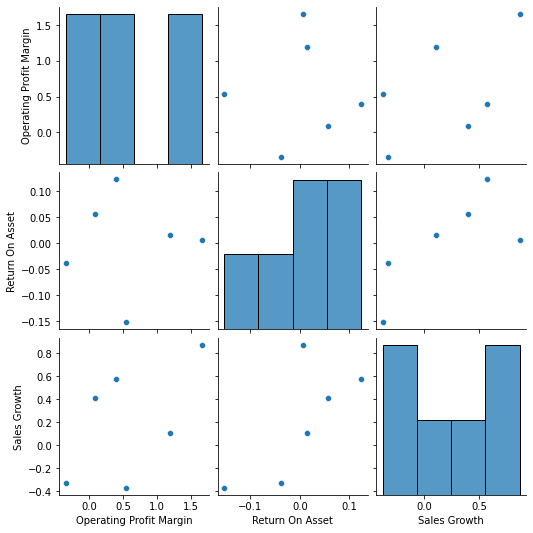

In [6]:
plt.figure(figsize=(15, 15))
sns.pairplot(df0, vars = df0.columns[1:13]);

# **2. Clustering**

# **2.1 Load Data**

In [7]:
df0 = pd.read_csv('../input/pertambangan/pertambangan.csv')
df1 = df0[['DER','Operating Profit Margin' ,'Return On Asset','Sales Growth','Category']]
df1.describe()

,DER,Operating Profit Margin,Return On Asset,Sales Growth,Category
count,6.000000,6.000000,6.000000,6.000000,0.0
mean,1.617647,0.588187,0.001798,0.209530,NaN
std,1.586060,0.729932,0.092940,0.499297,NaN
min,0.061522,-0.339042,-0.151998,-0.371777,NaN
25%,0.321239,0.163267,-0.027307,-0.219633,NaN
50%,1.236707,0.465073,0.010919,0.256043,NaN
75%,3.000349,1.028237,0.046199,0.532485,NaN
max,3.566634,1.659396,0.123039,0.870433,NaN


<AxesSubplot:xlabel='Emitten', ylabel='Operating Profit Margin'>

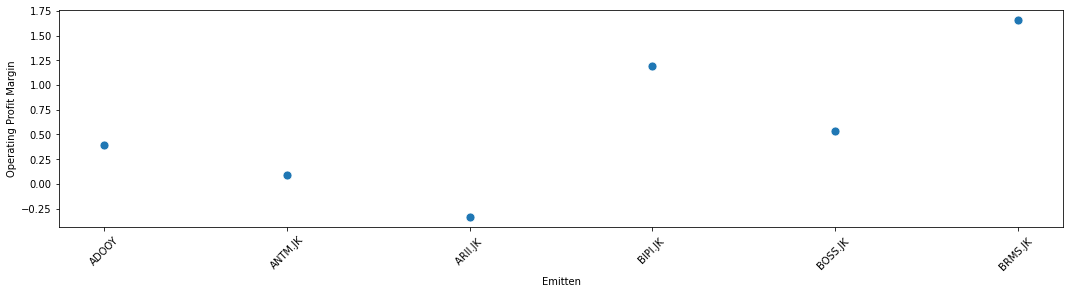

In [8]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Operating Profit Margin', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='DER'>

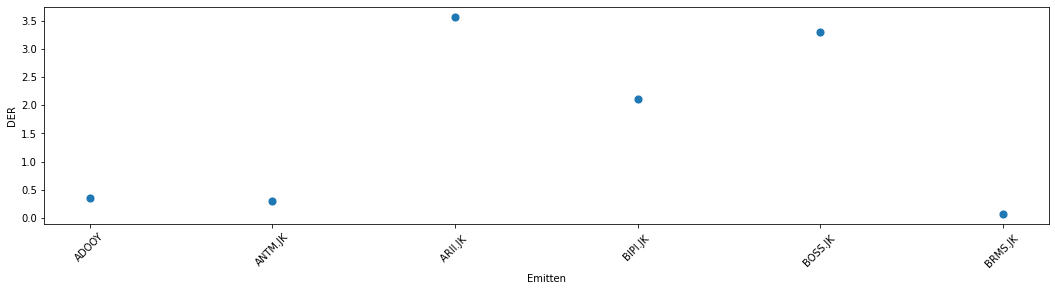

In [9]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='DER', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='Sales Growth'>

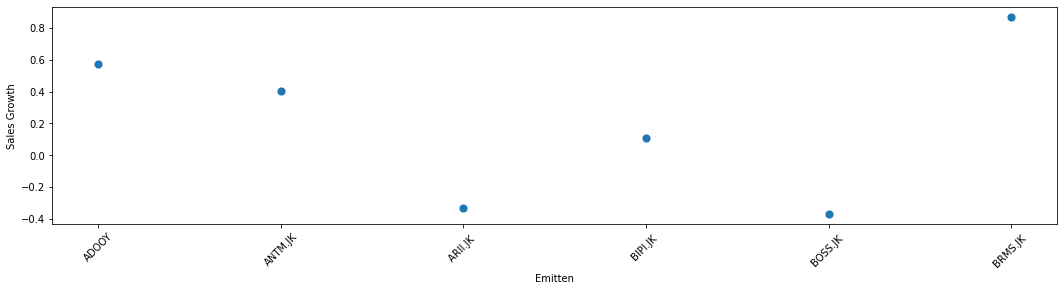

In [10]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Sales Growth', 
                data=df0, s=80)

# **2.2 Outlier**

In [11]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['Operating Profit Margin']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 6
Jumlah baris setelah memfilter outlier: 6


In [12]:
df1.describe()

,DER,Operating Profit Margin,Return On Asset,Sales Growth,Category
count,6.000000,6.000000,6.000000,6.000000,0.0
mean,1.617647,0.588187,0.001798,0.209530,NaN
std,1.586060,0.729932,0.092940,0.499297,NaN
min,0.061522,-0.339042,-0.151998,-0.371777,NaN
25%,0.321239,0.163267,-0.027307,-0.219633,NaN
50%,1.236707,0.465073,0.010919,0.256043,NaN
75%,3.000349,1.028237,0.046199,0.532485,NaN
max,3.566634,1.659396,0.123039,0.870433,NaN


# **2.3 Standardisasi Fitur**

In [13]:
feats = ['DER','Operating Profit Margin','Sales Growth']
X = df1[feats].values
y = df1['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER,Operating Profit Margin,Sales Growth
count,6.000000e+00,6.000000e+00,6.000000e+00
mean,1.480297e-16,7.401487e-17,1.480297e-16
std,1.095445e+00,1.095445e+00,1.095445e+00
min,-1.074770e+00,-1.391538e+00,-1.275372e+00
25%,-8.953910e-01,-6.376991e-01,-9.415737e-01
50%,-2.631044e-01,-1.847630e-01,1.020471e-01
75%,9.549919e-01,6.604039e-01,7.085541e-01
max,1.346108e+00,1.607616e+00,1.450002e+00


# **2.4 Lakukan K-means**

In [14]:
from sklearn.cluster import KMeans
wcss=[]

In [15]:
df0.shape

(6, 6)

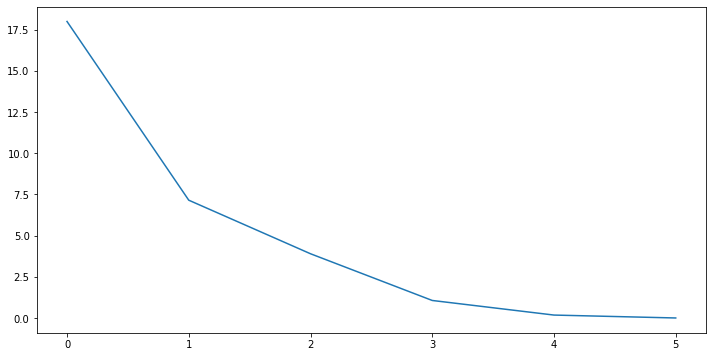

In [16]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 7):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

Ternyata clustering paling optimal di 2 cluster (n_cluster = 2)

# **2.5 Pilih Jumlah Cluster**

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=2, random_state=0)

In [18]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

# **2.6 Plot Cluster**

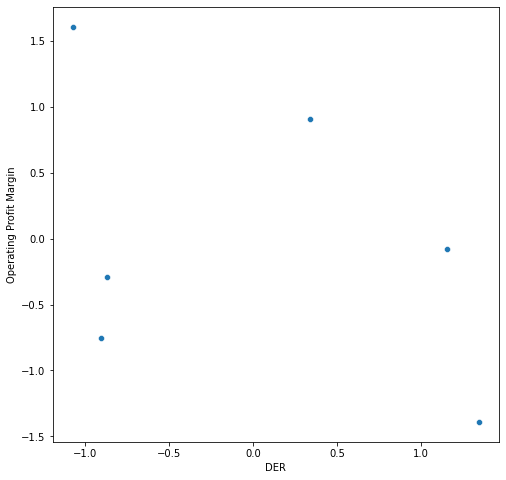

In [19]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='Operating Profit Margin', hue=new_df.target.to_list(), data=new_df);

In [20]:
new_df.head(5)

,DER,Operating Profit Margin,Sales Growth,target,fit
0,-0.868257,-0.292759,0.802127,NaN,0
1,-0.904436,-0.752679,0.427836,NaN,0
2,1.346108,-1.391538,-1.180851,NaN,1
3,0.342049,0.906127,-0.223742,NaN,0
4,1.159306,-0.076767,-1.275372,NaN,1


In [21]:
new_df.insert(0,"Category",np.nan,True)
new_df.loc[new_df['fit'] == 0, 'Category'] = 2
new_df.loc[new_df['fit'] == 1, 'Category'] = 4
new_df.loc[new_df['fit'] == 2, 'Category'] = 1
new_df.loc[new_df['fit'] == 3, 'Category'] = 0
new_df.loc[new_df['fit'] == 4, 'Category'] = 3
new_df['Category'] = new_df['Category'].astype(int)
new_df.head(5)

,Category,DER,Operating Profit Margin,Sales Growth,target,fit
0,2,-0.868257,-0.292759,0.802127,NaN,0
1,2,-0.904436,-0.752679,0.427836,NaN,0
2,4,1.346108,-1.391538,-1.180851,NaN,1
3,2,0.342049,0.906127,-0.223742,NaN,0
4,4,1.159306,-0.076767,-1.275372,NaN,1


In [22]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.columns = ['Category','DER (St.)','Operating Profit Margin (St.)', 'Sales Growth (St.)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       6 non-null      int64  
 1   DER (St.)                      6 non-null      float64
 2   Operating Profit Margin (St.)  6 non-null      float64
 3   Sales Growth (St.)             6 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 320.0 bytes


# **2.6.1 3D Scatter Plot**

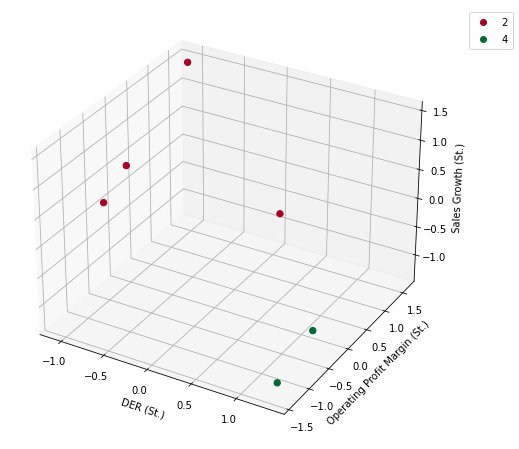

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['DER (St.)']
y = new_df['Operating Profit Margin (St.)']
z = new_df['Sales Growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

# **2.6.2 X vs Z View**

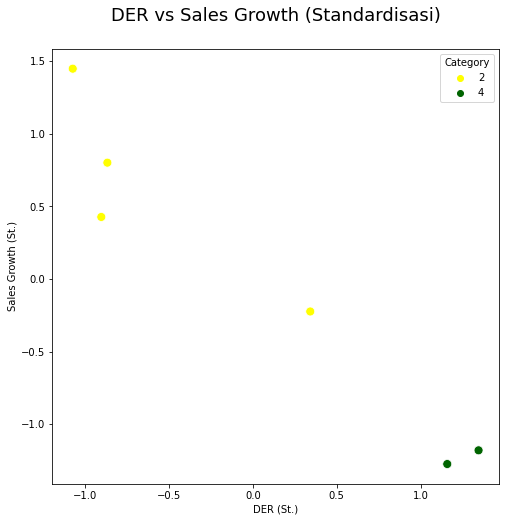

In [24]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()


# **2.6.3 Y vs Z View**

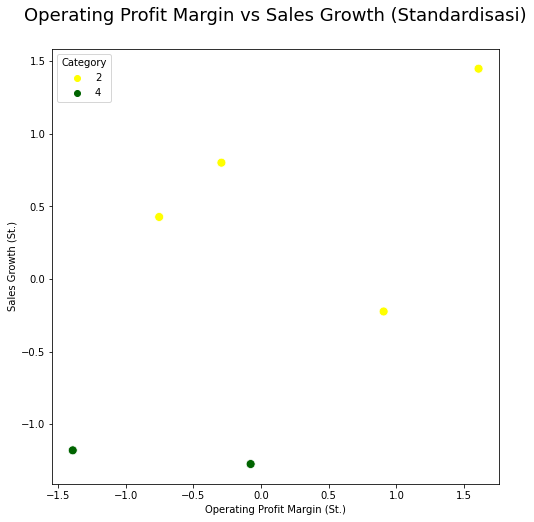

In [25]:
sns.scatterplot(x='Operating Profit Margin (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("Operating Profit Margin vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# **2.6.4 X vs Y View**

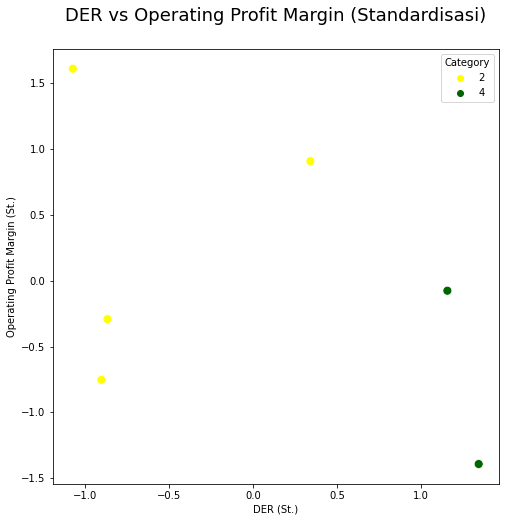

In [26]:
sns.scatterplot(x='DER (St.)', y='Operating Profit Margin (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Operating Profit Margin (Standardisasi)", fontsize=18, y=1.05)
plt.show()


# **3. Export Result**

Adjust **Initial Data** df0:


Delete outlier YELO and other column other than Emiten, DER,Operating Profit Margin,Sales Growth

In [27]:
# drop these row indexes
# from dataFrame
index_names = df0[ df0['Emitten'] == 'ARTO' ].index
df0.drop(index_names, inplace = True)
df0.reset_index(drop=True, inplace=True)
df0.drop(["Category"
         ], axis=1, inplace=True)

In [28]:
dftemp = pd.read_csv('../input/emitten-list/Emittenlist.csv')
df = pd.concat([dftemp, new_df, df0], axis=1)
df.head(6)

,Industry,Company,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),Emitten,DER,Operating Profit Margin,Return On Asset,Sales Growth
0,Pertambangan,Adaro Energy Indonesia Tbk.,2,-0.868257,-0.292759,0.802127,ADOOY,0.360525,0.393112,0.123039,0.575135
1,Pertambangan,Aneka Tambang Tbk.,2,-0.904436,-0.752679,0.427836,ANTM.JK,0.308144,0.086652,0.056560,0.404536
2,Pertambangan,Atlas Resources Tbk.,4,1.346108,-1.391538,-1.180851,ARII.JK,3.566634,-0.339042,-0.038650,-0.328694
3,Pertambangan,Astrindo Nusantara Infrastruktur Tbk.,2,0.342049,0.906127,-0.223742,BIPI.JK,2.112888,1.191971,0.015116,0.107550
4,Pertambangan,Borneo Olah Sarana Sukses Tbk.,4,1.159306,-0.076767,-1.275372,BOSS.JK,3.296169,0.537035,-0.151998,-0.371777
5,Pertambangan,Bumi Resources Minerals Tbk.,2,-1.074770,1.607616,1.450002,BRMS.JK,0.061522,1.659396,0.006723,0.870433


In [29]:
df.to_csv('result.csv', index = False)

# **4. Get Centroid**

In [30]:
kmeans.cluster_centers_

array([[-0.62635356,  0.36707622,  0.6140557 ],
       [ 1.25270712, -0.73415244, -1.22811141]])

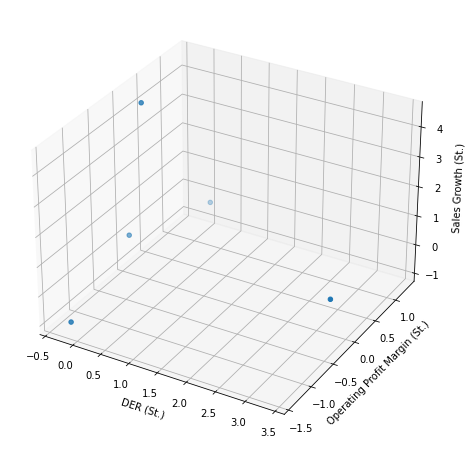

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [0.07796577,3.3825386,-0.19978728,-0.22183117,-0.32525515]
y = [1.27721216,-0.22442569,-1.39490532,0.15549501,-0.03911061]
z = [-0.22773712,0.35006475,-0.89274149,4.44060221,0.14030381]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")
ax.scatter(x, y, z)
plt.show()

# **5. Cluster Description**

In [32]:
#Highly Positively Impacted
df[df['Category'] == 4].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,4.0,1.252707,-0.734152,-1.228111,3.431401,0.098997,-0.095324,-0.350236
std,0.0,0.132089,0.929684,0.066837,0.191247,0.619480,0.080149,0.030464
min,4.0,1.159306,-1.391538,-1.275372,3.296169,-0.339042,-0.151998,-0.371777
25%,4.0,1.206007,-1.062845,-1.251742,3.363785,-0.120023,-0.123661,-0.361006
50%,4.0,1.252707,-0.734152,-1.228111,3.431401,0.098997,-0.095324,-0.350236
75%,4.0,1.299408,-0.405460,-1.204481,3.499018,0.318016,-0.066987,-0.339465
max,4.0,1.346108,-0.076767,-1.180851,3.566634,0.537035,-0.038650,-0.328694


In [33]:
#Highly Positively Impacted
df[df['Category'] == 3].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Highly Positively Impacted
df[df['Category'] == 2].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,2.0,-0.626354,0.367076,0.614056,0.710770,0.832783,0.050360,0.489413
std,0.0,0.651850,1.083013,0.700181,0.943793,0.721648,0.053126,0.319138
min,2.0,-1.074770,-0.752679,-0.223742,0.061522,0.086652,0.006723,0.107550
25%,2.0,-0.947019,-0.407739,0.264942,0.246488,0.316497,0.013018,0.330289
50%,2.0,-0.886347,0.306684,0.614981,0.334334,0.792541,0.035838,0.489835
75%,2.0,-0.565681,1.081500,0.964095,0.798616,1.308827,0.073180,0.648959
max,2.0,0.342049,1.607616,1.450002,2.112888,1.659396,0.123039,0.870433


In [35]:
#Highly Positively Impacted
df[df['Category'] == 1].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Highly Positively Impacted
df[df['Category'] == 0].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
